In [4]:
!nvidia-smi

Wed Jul  9 14:40:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.88                 Driver Version: 576.88         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   46C    P8              2W /   75W |    1164MiB /   8188MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [30]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...


In [7]:
%cd yolov10

[WinError 2] The system cannot find the file specified: 'yolov10'
c:\Users\Public\Documents\Codes\yolov10


In [8]:
import os
print(os.getcwd())

c:\Users\Public\Documents\Codes\yolov10


In [33]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded c:\Users\Public\Documents\Codes\yolov10\yolov10\weights\yolov10n.pt
Downloaded c:\Users\Public\Documents\Codes\yolov10\yolov10\weights\yolov10s.pt
Downloaded c:\Users\Public\Documents\Codes\yolov10\yolov10\weights\yolov10m.pt
Downloaded c:\Users\Public\Documents\Codes\yolov10\yolov10\weights\yolov10b.pt
Downloaded c:\Users\Public\Documents\Codes\yolov10\yolov10\weights\yolov10x.pt


In [18]:
!pip install ultralytics --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import ultralytics.nn.tasks
print(dir(ultralytics.nn.tasks))

['A2C2f', 'AConv', 'ADown', 'AIFI', 'BaseModel', 'Bottleneck', 'BottleneckCSP', 'C1', 'C2', 'C2PSA', 'C2f', 'C2fAttn', 'C2fCIB', 'C2fPSA', 'C3', 'C3Ghost', 'C3TR', 'C3k2', 'C3x', 'CBFuse', 'CBLinear', 'ClassificationModel', 'Classify', 'Concat', 'Conv', 'Conv2', 'ConvTranspose', 'DEFAULT_CFG_DICT', 'DEFAULT_CFG_KEYS', 'DWConv', 'DWConvTranspose2d', 'Detect', 'DetectionModel', 'E2EDetectLoss', 'ELAN1', 'Ensemble', 'Focus', 'GhostBottleneck', 'GhostConv', 'HGBlock', 'HGStem', 'ImagePoolingAttn', 'Index', 'LOGGER', 'LRPCHead', 'OBB', 'OBBModel', 'PSA', 'Path', 'Pose', 'PoseModel', 'RTDETRDecoder', 'RTDETRDetectionModel', 'RepC3', 'RepConv', 'RepNCSPELAN4', 'RepVGGDW', 'ResNetLayer', 'SCDown', 'SPP', 'SPPELAN', 'SPPF', 'SafeClass', 'SafeUnpickler', 'Segment', 'SegmentationModel', 'TorchVision', 'WorldDetect', 'WorldModel', 'YAML', 'YOLOEDetect', 'YOLOEModel', 'YOLOESegModel', 'YOLOESegment', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__sp

In [15]:
import torch
from ultralytics.nn.tasks import DetectionModel
torch.serialization.add_safe_globals([DetectionModel])

In [11]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
Device count: 1
Current device: 0
Device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [12]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 2.7.1+cu118
CUDA available: True
CUDA version: 11.8


In [13]:
import ultralytics
print(ultralytics.__version__)

8.3.163


In [ ]:
!yolo version

WARNING argument '--version' does not require leading dashes '--', updating to 'version'.
8.3.163


In [19]:
!yolo task=detect mode=train epochs=100 batch=16 plots=True model=weights/yolov10n.pt data=C:\Users\Public\Documents\Codes\yolov10\license_data\data.yaml


train: Scanning C:\Users\Public\Documents\Codes\yolov10\license_data\train\labels.cache... 1500 images, 47 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<?, ?it/s]
train: Scanning C:\Users\Public\Documents\Codes\yolov10\license_data\train\labels.cache... 1500 images, 47 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<?, ?it/s]

val: Scanning C:\Users\Public\Documents\Codes\yolov10\license_data\valid\labels.cache... 430 images, 0 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<?, ?it/s]
val: Scanning C:\Users\Public\Documents\Codes\yolov10\license_data\valid\labels.cache... 430 images, 0 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]
      1/100      2.63G      3.125      8.766       3.89         43        640:   0%|          | 0/94 [00:01<?, ?it/s]
      1/100      2.63G      3.125      8.766       3.89         43        640:   1%|          | 1/94 [00:01<02:53,  1.87s/it]
      1/100      2.66G    

Ultralytics 8.3.163  Python-3.12.10 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Public\Documents\Codes\yolov10\license_data\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=weights/yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=


     25/100      3.09G      1.564      1.101      2.353         34        640:  74%|███████▍  | 70/94 [00:12<00:04,  5.60it/s]
     25/100      3.09G      1.568       1.11      2.354         50        640:  74%|███████▍  | 70/94 [00:12<00:04,  5.60it/s]
     25/100      3.09G      1.568       1.11      2.354         50        640:  76%|███████▌  | 71/94 [00:12<00:03,  5.80it/s]
     25/100      3.09G      1.568      1.111      2.354         32        640:  76%|███████▌  | 71/94 [00:12<00:03,  5.80it/s]
     25/100      3.09G      1.568      1.111      2.354         32        640:  77%|███████▋  | 72/94 [00:12<00:03,  5.88it/s]
     25/100      3.09G      1.568      1.109      2.352         42        640:  77%|███████▋  | 72/94 [00:12<00:03,  5.88it/s]
     25/100      3.09G      1.568      1.109      2.352         42        640:  78%|███████▊  | 73/94 [00:12<00:03,  5.93it/s]
     25/100      3.09G      1.572       1.11      2.357         29        640:  78%|███████▊  | 73/94 [00:13<0

In [25]:
!yolo task=detect mode=predict conf=0.25 save=True model="C:\Users\Public\Documents\Codes\yolov10\runs\detect\train10\weights\best.pt" source="C:\Users\Public\Documents\Codes\Images\B 7830 XPF.png"

Ultralytics 8.3.163  Python-3.12.10 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv10n summary (fused): 102 layers, 2,265,363 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 C:\Users\Public\Documents\Codes\Images\B 7830 XPF.png: 384x640 1 plat, 73.5ms
Speed: 2.8ms preprocess, 73.5ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
 Learn more at https://docs.ultralytics.com/modes/predict



image 1/1 C:\Users\Public\Documents\Codes\Images\B 7830 XPF.png: 384x640 1 plat, 44.1ms
Speed: 1.5ms preprocess, 44.1ms inference, 10.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict3
Koordinat bounding box: (1012, 563, 1180, 615)


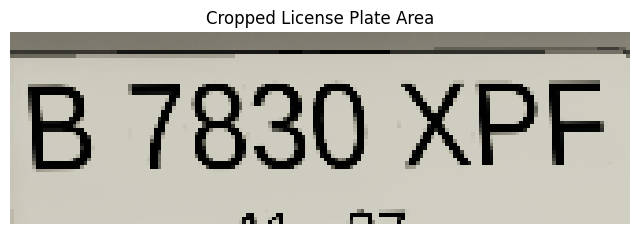

Cropped image saved as cropped_B_7830_XPF.png


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr

# Muat model
model = YOLO("C:/Users/Public/Documents/Codes/yolov10/runs/detect/train10/weights/best.pt")


# Lakukan prediksi dan simpan hasil
results = model.predict(
    source="C:/Users/Public/Documents/Codes/Images/B 7830 XPF.png",
    conf=0.25,
    save=True
)

# Ambil koordinat dari hasil pertama (karena 1 gambar)
result = results[0]
boxes = result.boxes.xyxy  # Koordinat [x1, y1, x2, y2]
confidences = result.boxes.conf
classes = result.boxes.cls

# Ambil kotak pertama (karena 1 deteksi)
if len(boxes) > 0:
    x1, y1, x2, y2 = map(int, boxes[0])  # Konversi ke integer
    print(f"Koordinat bounding box: ({x1}, {y1}, {x2}, {y2})")

    # Muat gambar asli
    image = cv2.imread("C:/Users/Public/Documents/Codes/Images/B 7830 XPF.png")
    cropped_image = image[y1:y2, x1:x2]

    # Konversi dari BGR ke RGB untuk tampilan yang benar
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Tampilkan di Jupyter Notebook
    plt.figure(figsize=(8, 4))
    plt.imshow(cropped_image_rgb)
    plt.title("Cropped License Plate Area")
    plt.axis('off')
    plt.show()

    # Simpan gambar yang dipotong (opsional)
    cv2.imwrite("cropped_B_7830_XPF.png", cropped_image)
    print("Cropped image saved as cropped_B_7830_XPF.png")
else:
    print("No detections found.")


image 1/1 C:\Users\Public\Documents\Codes\Images\B 6785 IQY.png: 384x640 1 plat, 40.9ms
Speed: 1.5ms preprocess, 40.9ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
Koordinat bounding box: (1157, 764, 1329, 809)


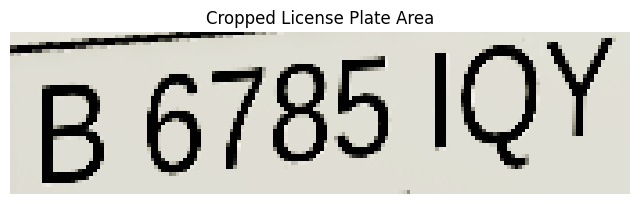

Teks yang terdeteksi:
Teks: B 6785 IQY, Probabilitas: 0.78
Cropped image saved as cropped_B_9794_CRW.png


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr

# Muat model
model = YOLO("C:/Users/Public/Documents/Codes/yolov10/runs/detect/train10/weights/best.pt")

# Lakukan prediksi
image_path = "C:/Users/Public/Documents/Codes/Images/B 6785 IQY.png"
results = model.predict(
    source=image_path,
    conf=0.25,
    save=True
)

# Ambil hasil pertama
result = results[0]
boxes = result.boxes.xyxy  # Koordinat [x1, y1, x2, y2]
confidences = result.boxes.conf
classes = result.boxes.cls

# Proses jika ada deteksi
if len(boxes) > 0:
    # Ambil kotak pertama (karena 1 deteksi)
    x1, y1, x2, y2 = map(int, boxes[0])
    print(f"Koordinat bounding box: ({x1}, {y1}, {x2}, {y2})")

    # Muat gambar asli (sama dengan source)
    image = cv2.imread(image_path)
    cropped_image = image[y1:y2, x1:x2]

    # Konversi dari BGR ke RGB untuk tampilan
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar yang dipotong di Jupyter Notebook
    plt.figure(figsize=(8, 4))
    plt.imshow(cropped_image_rgb)
    plt.title("Cropped License Plate Area")
    plt.axis('off')
    plt.show()

    # Inisialisasi EasyOCR (tambahkan 'id' untuk bahasa Indonesia)
    reader = easyocr.Reader(['en', 'id'])

    # Deteksi teks dari area yang dipotong
    results = reader.readtext(cropped_image_rgb)

    # Tampilkan teks yang terdeteksi
    if results:
        print("Teks yang terdeteksi:")
        for (bbox, text, prob) in results:
            print(f"Teks: {text}, Probabilitas: {prob:.2f}")
    else:
        print("Tidak ada teks yang terdeteksi.")

    # Simpan gambar yang dipotong (opsional)
    cv2.imwrite("cropped_B_9794_CRW.png", cropped_image)
    print("Cropped image saved as cropped_B_9794_CRW.png")
else:
    print("Tidak ada deteksi plat nomor.")